In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
from  matplotlib import pyplot as plt 
from wigner import get_wigner, get_center_eigenvalues_differences, get_ensemble, get_semicircle_law
pi = np.pi
sqrt = np.sqrt



In [8]:
get_weight_path = lambda ensemble, step: "weight_history/ensemble={}_step={}.txt".format(ensemble, step)

In [9]:
wich_steps = list(range(0, 200, 10))


In [10]:
def get_weight(ensemble, step):
    weight_path = get_weight_path(ensemble, step)
    weight_array = np.loadtxt(weight_path).view(complex)
    return weight_array



### Check if ensembles are not the same 

If random seed is hard cooded then response will be True, if everthing is ok the  output must be False

In [95]:
for i_test in range(10):
    step_test = np.random.choice([0, 100])
    ensemble_test = np.random.randint(1, 100)
    print(np.allclose(get_weight(ensemble_test,  step_test), get_weight(ensemble_test+1, step_test)))

False
False
False
False
False
False
False
False
False
False


In [12]:
np.allclose(get_weight(1,  0), get_weight(1, 10))

False

In [127]:
def get_data_frame(steps, ensembles):
    df_list = [[], []]

    for step, ensemble in zip(steps, ensembles):
        weight = get_weight(ensemble, step)
        for eigen in weight:
            df_list[0].append(step)
            df_list[1].append(eigen)


    df = pd.DataFrame({"step": df_list[0], "eigen": df_list[1],})
    return df
       

In [128]:
df = get_data_frame(steps=wich_steps, ensembles=range(1000))

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 2 columns):
eigen    3360 non-null complex128
step     3360 non-null int64
dtypes: complex128(1), int64(1)
memory usage: 78.8 KB


In [148]:
df.describe()

,eigen,step
count,3.360000e+03,3360.000000
mean,8.318132e-05,95.000000
std,2.172380e-04,57.671396
min,4.985197e-315,0.000000
25%,3.012498e-09,47.500000
50%,9.459187e-07,95.000000
75%,4.965677e-05,142.500000
max,1.965821e-03,190.000000


In [139]:
def transform_eigen(df, func):
    df['eigen'] = df['eigen'].apply(lambda eigen: func(eigen))
    return df


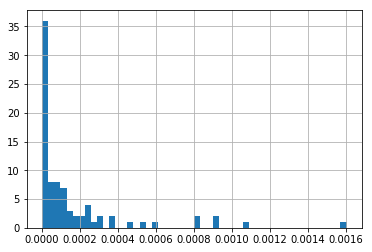

In [146]:

df_abs = transform_eigen(df, np.real)
df_abs[(df_abs.step==0) & (df_abs.eigen > 1e-6)].eigen.hist(bins=50)

In [126]:
df_abs

,eigen,step
0,200.000000,0
1,200.000814,0
2,200.000815,0
3,200.001603,0
4,200.001630,0
5,200.000378,0
6,200.000228,0
7,200.001074,0
8,200.001074,0
9,200.000240,0


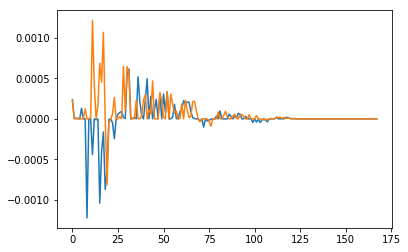

In [103]:
plt.plot(np.real(get_weight(1, 120)))
plt.plot(np.real(get_weight(1, 10)))